In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load the dataset into python environment

In [49]:
data=pd.read_csv(r'C:\Users\user\Downloads\titanic_dataset.csv')

In [50]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [51]:
data['Embarked'].nunique()

3

In [52]:
data.shape

(891, 12)

In [53]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# 2. Do all the necessary pre-processing steps 

In [61]:
#filling missing values by interpolation & backfill or forward fill
data['Age']=data['Age'].interpolate(method='linear')
data['Embarked'].fillna(method='ffill',inplace=True)

In [62]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [63]:
data1=data.drop(columns=['PassengerId','Ticket','Cabin'])#dropping columns

In [64]:
data1.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [65]:
data1['Embarked'].value_counts()

S    644
C    169
Q     78
Name: Embarked, dtype: int64

In [66]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
data1['Embarked']=label_encoder.fit_transform(data1['Embarked'])

In [69]:
data1=pd.get_dummies(data1,columns=['Sex'])

In [70]:
data1.head()

,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male
0,0,3,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,2,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,0,1,0
2,1,3,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,2,1,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,2,1,0
4,0,3,"Allen, Mr. William Henry",35.0,0,0,8.0500,2,0,1


In [71]:
#minmax scaling age,fare
colm_scale=['Age','Fare']
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
data1[colm_scale]=scaler.fit_transform(data1[colm_scale])

In [72]:
data1.head()

,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male
0,0,3,"Braund, Mr. Owen Harris",0.271174,1,0,0.014151,2,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.472229,1,0,0.139136,0,1,0
2,1,3,"Heikkinen, Miss. Laina",0.321438,0,0,0.015469,2,1,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.434531,1,0,0.103644,2,1,0
4,0,3,"Allen, Mr. William Henry",0.434531,0,0,0.015713,2,0,1


In [92]:
data1['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [94]:
data1.shape

(891, 10)

# Splitting data into feature and target

In [78]:
x=data1.drop(['Survived','Name'],axis=1)
y=data1['Survived']

In [79]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

# 3. Create kNN and SVM models 

# Knn

In [82]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [83]:
metric=[]
neighbors=np.arange(3,15)

for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors= k,metric='minkowski',p=2)
    classifier.fit(x_train,y_train)
    y_pred_knn=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred_knn)
    metric.append(acc)

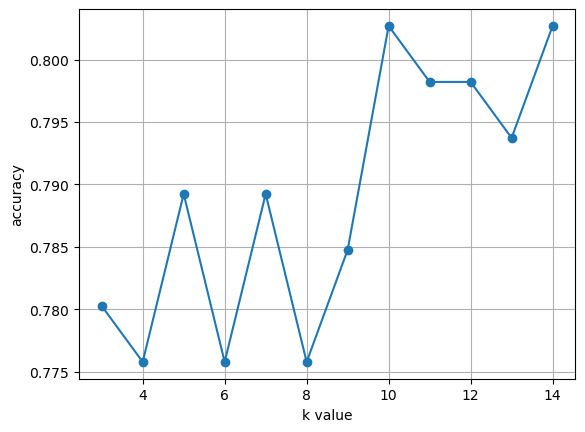

In [84]:
#plottiing accuracy scores
plt.plot(neighbors,metric,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()

In [85]:
#highest value of accuracy is for k=10,14 and checking for 10
classifier = KNeighborsClassifier(n_neighbors= 10,metric='minkowski',p=2)
classifier.fit(x_train,y_train)
y_pred_knn=classifier.predict(x_test)

In [87]:
print('Accuracy:',accuracy_score(y_test,y_pred_knn))
print('precision:',precision_score(y_test,y_pred_knn))
print('recall:',recall_score(y_test,y_pred_knn))
print('f1:',f1_score(y_test,y_pred_knn))

Accuracy: 0.8026905829596412
precision: 0.8082191780821918
recall: 0.6629213483146067
f1: 0.7283950617283951


In [88]:
confusion_matrix(y_test,y_pred_knn)

array([[120,  14],
       [ 30,  59]], dtype=int64)

In [89]:
#For k=14
classifier = KNeighborsClassifier(n_neighbors= 14,metric='minkowski',p=2)
classifier.fit(x_train,y_train)
y_pred_knn=classifier.predict(x_test)
print('Accuracy:',accuracy_score(y_test,y_pred_knn))
print('precision:',precision_score(y_test,y_pred_knn))
print('recall:',recall_score(y_test,y_pred_knn))
print('f1:',f1_score(y_test,y_pred_knn))

Accuracy: 0.8026905829596412
precision: 0.8082191780821918
recall: 0.6629213483146067
f1: 0.7283950617283951


In [90]:
confusion_matrix(y_test,y_pred_knn)

array([[120,  14],
       [ 30,  59]], dtype=int64)

# SVM Model

In [98]:
from sklearn.svm import SVC
svmclf=SVC(kernel='linear')
svmclf.fit(x_train,y_train)
y_predsvm=svmclf.predict(x_test)

In [100]:
print('Accuracy:',accuracy_score(y_test,y_predsvm))

Accuracy: 0.7847533632286996


In [101]:
confusion_matrix(y_test,y_predsvm)

array([[112,  22],
       [ 26,  63]], dtype=int64)

# 4. Do k-fold and stratified stratified k-fold cross validation techniques and find the average accuracy score of the models 

# Cross Validation-k fold Cross Validation

# k fold in knn

In [102]:
from sklearn.model_selection import KFold

In [103]:
kfold_validator=KFold(11)#11 folds so 81 datapoints for testing

In [105]:
for train_index,test_index in kfold_validator.split(x,y):#how datapoints are taken in k fold 
    print('Training Index:',train_index)
    print('Testing Index:',test_index)
    

Training Index: [ 81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98
  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116
 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134
 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152
 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170
 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188
 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206
 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224
 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242
 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260
 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278
 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296
 297 298 299 300 301 302 303 304 305 306 307 308 309 310 311 312 313 314
 315 316 317 318 319 320 321 322 32

In [106]:
from sklearn.model_selection import cross_val_score

In [107]:
cv_result=cross_val_score(classifier,x,y,cv=kfold_validator)

In [108]:
cv_result

array([0.7654321 , 0.82716049, 0.80246914, 0.81481481, 0.88888889,
       0.79012346, 0.80246914, 0.79012346, 0.74074074, 0.82716049,
       0.80246914])

In [109]:
np.mean(cv_result)

0.8047138047138046

# average accuracy of knn using kfold cross validation is 80.47

# k fold in SVM

In [110]:
svm_result=cross_val_score(svmclf,x,y,cv=kfold_validator)

In [111]:
svm_result

array([0.80246914, 0.82716049, 0.77777778, 0.77777778, 0.83950617,
       0.7654321 , 0.77777778, 0.71604938, 0.79012346, 0.79012346,
       0.79012346])

In [112]:
np.mean(svm_result)

0.7867564534231201

# using kfold the average accuracy of SVM model is 78.68

# stratified Cross validation in KNN

In [113]:
from sklearn.model_selection import StratifiedKFold
skfold_validator=StratifiedKFold(n_splits=11)
for train_index,test_index in skfold_validator.split(x,y):#continuous points are not taken
    print('Training Index:',train_index)
    print('Testing Index:',test_index)

Training Index: [ 74  78  79  81  82  84  85  88  89  90  91  92  93  94  95  96  97  98
  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116
 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134
 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152
 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170
 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188
 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206
 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224
 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242
 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260
 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278
 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296
 297 298 299 300 301 302 303 304 305 306 307 308 309 310 311 312 313 314
 315 316 317 318 319 320 321 322 32

In [114]:
skcv_result=cross_val_score(classifier,x,y,cv=skfold_validator)

In [115]:
skcv_result

array([0.79012346, 0.77777778, 0.79012346, 0.83950617, 0.90123457,
       0.80246914, 0.80246914, 0.79012346, 0.74074074, 0.82716049,
       0.77777778])

In [116]:
np.mean(skcv_result)

0.8035914702581369

# Average accuracy score of stratified cross validation in Knn is 80.36

# stratified Cross validation in SVM

In [117]:
scvsvm_result=cross_val_score(svmclf,x,y,cv=skfold_validator)

In [118]:
scvsvm_result

array([0.82716049, 0.77777778, 0.79012346, 0.79012346, 0.85185185,
       0.7654321 , 0.75308642, 0.75308642, 0.7654321 , 0.81481481,
       0.7654321 ])

In [119]:
np.mean(scvsvm_result)

0.7867564534231201

# # Average accuracy score of stratified cross validation in SVM is 78.7